<a href="https://colab.research.google.com/github/ThePyProgrammer/30-seconds-template/blob/master/Testing%20Malaya%20Speech%20for%20the%20Creation%20of%20a%20Singlish%20Voice%20Server.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing Malaya Speech
<font size="5">for the Creation of a Singlish Voice Server</font>

## Task Description
In this notebook, we will be creating a Voice Pack for the Singaporean Accent, which we intend to use for the [Project Saylah](https://github.com/bettersg/saylah). This project is done by [better.sg](https://better.sg).

### Model Description
The model used is [Malaya Speech's TTS Singlish Model](https://malaya-speech.readthedocs.io/en/latest/tts-singlish.html) which has been encoded in TensorFlow and a custom Tacotron implementation. We intend to use this using Vue and [a Flask Server deployed on Firebase Hosting using Google Cloud Run](https://medium.com/firebase-developers/hosting-flask-servers-on-firebase-from-scratch-c97cfb204579). We are referring to [this Spring-React Stack Overflow question](https://stackoverflow.com/questions/65880004/how-to-send-mp3-file-from-java-backend-to-frontend-and-play-the-file-in-the-vue/65889461#65889461).

## Set-Up and Imports

### Install Dependencies

In [ ]:
pip install malaya malaya-speech pydub

     |████████████████████████████████| 2.2 MB 12.0 MB/s 
     |████████████████████████████████| 929 kB 68.7 MB/s 
     |████████████████████████████████| 288 kB 71.4 MB/s 
     |████████████████████████████████| 1.6 MB 61.0 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 235 kB 84.4 MB/s 
     |████████████████████████████████| 1.2 MB 88.0 MB/s 
     |████████████████████████████████| 41 kB 172 kB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=30aadf399bb5e3aff55b80250ab76832f1e540fa27104d62b2ae9e7c1e748378
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=cdab8c67d1607a37d76ac9dba9743414b167f37151fa2fc00d1ba6dea7d51c7d
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for 

### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import pydub
from io import BytesIO
import malaya_speech
import IPython.display as ipd

## Modelling

### Load Tacotron Model

In [ ]:
tacotron = malaya_speech.tts.tacotron2(model='female-singlish')

### Load Vocoder Model

In [ ]:
vocoder = malaya_speech.vocoder.melgan(model='universal-1024')

### Make a Prediction

#### Use the Tacotron

In [ ]:
r = tacotron.predict("Hello World, this is a test of a Singaporean accent. Currently we only have a female singlish accent but let's see how it goes.")
r

{'alignment': array([[9.74694729e-01, 9.66041684e-02, 4.28579599e-02, ...,
         2.00460466e-08, 9.70108189e-08, 8.85578356e-06],
        [1.54535845e-02, 4.81355757e-01, 6.33779347e-01, ...,
         1.28116193e-08, 6.49830696e-08, 9.93925460e-06],
        [5.18915849e-03, 4.11265075e-01, 3.10412884e-01, ...,
         4.13131289e-08, 3.72316606e-07, 2.89655000e-05],
        ...,
        [2.35636406e-07, 5.73671457e-07, 1.54131271e-06, ...,
         2.82221496e-01, 2.46801704e-01, 5.23402728e-02],
        [4.04199085e-07, 9.56838335e-07, 2.12571763e-06, ...,
         4.06578809e-01, 1.72008380e-01, 2.77262658e-01],
        [2.85377832e-10, 4.41574999e-10, 3.60567798e-10, ...,
         1.60426298e-05, 2.69524637e-04, 4.61290270e-01]], dtype=float32),
 'decoder-output': array([[-1.3869104 , -1.6128407 , -1.7616607 , ..., -1.2392874 ,
         -1.3401701 , -1.3598568 ],
        [-0.5553242 , -0.974247  , -1.1198071 , ..., -0.4009968 ,
         -0.45127505, -0.44599107],
        [-0.330

#### Plot the Spectrogram Produced

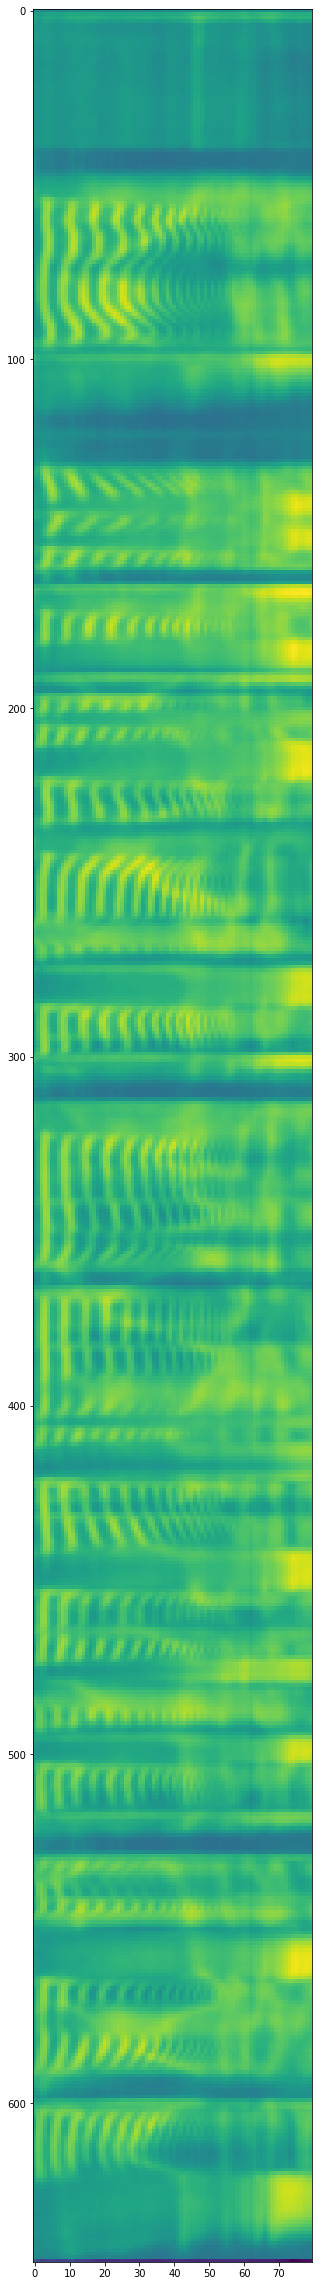

In [ ]:
plt.figure(figsize=(5, 60))
plt.imshow(r["universal-output"])

#### Use a Vocoder to Invert the Spectrogram

In [ ]:
y_ = vocoder(r['universal-output'])
y_

array([-0.00014005,  0.00084866,  0.00104955, ..., -0.00043749,
       -0.00010785,  0.00020188], dtype=float32)

#### Test the Audio

In [ ]:
ipd.Audio(y_, rate = 22050)

#### Plot the Sound Array

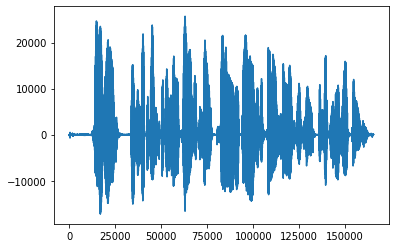

In [ ]:
y = (np.iinfo(np.int16).max * y_).astype(np.int16)
plt.plot(y)

### Convert the Predictions

#### Convert the Prediction to a `.wav` file

In [ ]:
wav = BytesIO(bytes())
write(wav, 22050, y)
wav.read()

b'RIFF$\x0c\x05\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00"V\x00\x00D\xac\x00\x00\x02\x00\x10\x00data\x00\x0c\x05\x00\xfc\xff\x1b\x00"\x00$\x00\x1a\x00\x04\x00\xf3\xff\xee\xff\xf9\xff\xf0\xff\xf3\xff\xed\xff\xe1\xff\xda\xff\xc8\xff\xc9\xff\xc3\xff\xc6\xff\xc7\xff\xc8\xff\xd0\xff\xcc\xff\xc7\xff\xbc\xff\xc3\xff\xc4\xff\xc2\xff\xbd\xff\xc1\xff\xbd\xff\xc1\xff\xc6\xff\xc6\xff\xc6\xff\xc6\xff\xc8\xff\xce\xff\xd1\xff\xdc\xff\xd4\xff\xd8\xff\xd5\xff\xd6\xff\xd5\xff\xd9\xff\xdd\xff\xe0\xff\xe0\xff\xdf\xff\xe0\xff\xe0\xff\xdb\xff\xda\xff\xdd\xff\xe1\xff\xe0\xff\xdb\xff\xd6\xff\xd6\xff\xd6\xff\xd6\xff\xd8\xff\xd1\xff\xcd\xff\xd0\xff\xcc\xff\xca\xff\xc1\xff\xc2\xff\xc1\xff\xc0\xff\xbd\xff\xb5\xff\xb3\xff\xb3\xff\xb8\xff\xb0\xff\xa7\xff\xa6\xff\xaa\xff\xa3\xff\xa6\xff\xa7\xff\xa9\xff\xa2\xff\x9a\xff\x9c\xff\x9d\xff\x8f\xff\x88\xff\x82\xff\x82\xff\x8a\xff\x8a\xff\x87\xff\x7f\xffw\xffu\xffp\xffo\xffs\xffs\xffx\xffy\xffv\xffx\xffy\xff|\xff\x86\xff\x86\xff\x8b\xff\x8d\xff\x93\xff\x9b\xff\x9c\xff\x9b

#### Convert the Prediction to a `.mp3` file

In [ ]:
mp3 = BytesIO(bytes())
song = pydub.AudioSegment(y.tobytes(), frame_rate=22050, sample_width=2, channels=1)
song.export(mp3, format="mp3", bitrate="320k")
mp3.seek(0)
mp3.read()

b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00\x0f\x00\x00\x03Lavf57.83.100\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xf3\xe0\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00Info\x00\x00\x00\x0f\x00\x00\x01"\x00\x02Q\xe0\x00\x03\x06\x08\x0b\x0e\x10\x13\x15\x18\x1b\x1d\x1f"$\'*,/2469;>ACFIKNPRUWZ]_begilnqtvy|~\x81\x83\x85\x88\x8a\x8d\x90\x92\x95\x98\x9a\x9c\x9f\xa1\xa4\xa7\xa9\xac\xaf\xb1\xb4\xb6\xb8\xbb\xbe\xc0\xc3\xc5\xc8\xcb\xcd\xcf\xd2\xd4\xd7\xda\xdc\xdf\xe2\xe4\xe7\xe9\xeb\xee\xf1\xf3\xf6\xf8\xfb\xfe\x00\x00\x00\x00Lavc57.10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00$\x04@\x00\x00\x00\x00\x00\x02Q\xe0\xf1\xc9\xe9\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

## Produce a Working Prototype
This would be the final script used in the server.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
from io import BytesIO
import malaya_speech

tacotron = malaya_speech.tts.tacotron2(model='female-singlish')
vocoder = malaya_speech.vocoder.melgan(model='universal-1024')

mp3 = BytesIO()
AudioSegment((np.iinfo(np.int16).max * vocoder(tacotron.predict("Hello World, this is a test of a Singaporean accent. Currently we only have a female singlish accent but let's see how it goes.")["universal-output"])).astype(np.int16).tobytes(), frame_rate=22050, sample_width=2, channels=1).export(mp3, format="mp3", bitrate="320k")
mp3.seek(0)

print(mp3.read())

/usr/local/lib/python3.7/dist-packages/malaya_boilerplate/frozen_graph.py:28: UserWarning: Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0
  'Cannot import beam_search_ops from Tensorflow Addons, `deep_model` for stemmer will not available to use, make sure Tensorflow Addons version >= 0.12.0'
/usr/local/lib/python3.7/dist-packages/malaya/preprocessing.py:259: FutureWarning: Possible nested set at position 1295
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


downloading frozen model to /root/Malaya-Speech/tts/tacotron2-female-singlish/model.pb


 99%|█████████▉| 99.0/99.5 [00:06<00:00, 19.1MB/s]/usr/local/lib/python3.7/dist-packages/tqdm/std.py:536: TqdmWarning: clamping frac to range [0, 1]
  colour=colour)
100%|██████████| 100/99.5 [00:06<00:00, 15.4MB/s] 


downloading frozen stats to /root/Malaya-Speech/tts/stats/female-singlish.npy


1.00MB [00:00, 683MB/s]                    


downloading frozen model to /root/Malaya-Speech/vocoder-melgan/universal-1024/model.pb


76.0MB [00:05, 14.6MB/s]                          


b'ID3\x04\x00\x00\x00\x00\x00#TSSE\x00\x00\x00\x0f\x00\x00\x03Lavf57.83.100\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xf3\xe0\xc0\x00\x00\x00\x00\x00\x00\x00\x00\x00Info\x00\x00\x00\x0f\x00\x00\x01\x06\x00\x02\x18\xbc\x00\x03\x06\x08\x0b\x0e\x10\x13\x15\x18\x1b\x1d #$\'),/1479<>ADFIJMPRUXZ]_begjmnqsvy{~\x81\x83\x86\x88\x8b\x8e\x90\x92\x94\x97\x9a\x9c\x9f\xa2\xa4\xa7\xa9\xac\xaf\xb1\xb4\xb6\xb8\xbb\xbd\xc0\xc3\xc5\xc8\xca\xcd\xd0\xd2\xd5\xd8\xda\xdc\xde\xe1\xe4\xe6\xe9\xec\xee\xf1\xf3\xf6\xf9\xfb\xfe\x00\x00\x00\x00Lavc57.10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00$\x03@\x00\x00\x00\x00\x00\x02\x18\xbc\xca<\x01\xe2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

A project by [`better.sg`](https://better.sg).

Find Saylah! at [`saylah.sg`](https://saylah.sg).

Find our GitHub Repository at [`bettersg/saylah`](https://github.com/bettersg/saylah).

<img src="https://camo.githubusercontent.com/d999b7c026fc7fe84d58c27d1cc75d9488b78e7c76fb241cdc11a5913a1cecd6/68747470733a2f2f6265747465722e73672f77702d636f6e74656e742f75706c6f6164732f323032302f31322f626574746572776f72646c6f676f40302e35782e706e67" alt="better.sg logo" border="0" width="100" align="right">